## Introducción/ *Introduction*

XGBoost, abreviatura de "Extreme Gradient Boosting," es un modelo de aprendizaje automático ampliamente utilizado que se destaca por su eficacia en la predicción de series temporales. Funciona mediante la construcción secuencial de árboles de decisión débiles, donde cada árbol corrige los errores del anterior. Esta técnica de aumento (boosting) optimiza la precisión al combinar múltiples modelos más simples en uno más poderoso.

XGBoost se destaca en la predicción de series temporales debido a su capacidad para manejar relaciones no lineales, identificar patrones de datos y lidiar con valores atípicos de manera efectiva. También incluye características como la regularización, lo que ayuda a prevenir el sobreajuste, y permite una personalización exhaustiva de los hiperparámetros.

En comparación con otros modelos de predicción de series temporales, XGBoost sobresale por su versatilidad y rapidez, lo que lo hace especialmente útil en escenarios en los que se requiere un equilibrio entre precisión y velocidad. Su capacidad para manejar grandes conjuntos de datos y manejar múltiples variables de entrada le otorga una ventaja distintiva. Además, a menudo supera a modelos tradicionales como ARIMA o modelos de suavizado exponencial en términos de rendimiento y precisión, lo que lo convierte en una elección atractiva para tareas de predicción de series temporales en una variedad de aplicaciones.

*XGBoost, short for "Extreme Gradient Boosting," is a widely used machine learning model known for its effectiveness in time series prediction. It operates by sequentially building weak decision trees, where each tree corrects the errors of the previous one. This boosting technique optimizes accuracy by combining multiple simpler models into a more powerful one.*

*XGBoost excels in time series prediction due to its ability to handle non-linear relationships, identify data patterns, and effectively deal with outliers. It also incorporates features like regularization, which helps prevent overfitting, and allows for extensive hyperparameter tuning.*

*Compared to other time series prediction models, XGBoost stands out for its versatility and speed, making it particularly useful in scenarios where a balance between accuracy and speed is required. Its capacity to handle large datasets and manage multiple input variables gives it a distinctive edge. Furthermore, it often outperforms traditional models like ARIMA or exponential smoothing models in terms of performance and accuracy, making it an attractive choice *for time series prediction tasks in a variety of applications.

## *Libraries and data loading*

In [1]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Import libraries
import random
import os
import numpy as np
import pandas as pd
import requests

# Date
import datetime as dt
from datetime import date, timedelta, datetime
import time

# EDA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Time Series - EDA and Modelling
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from itertools import product

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score


# Modeling and preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from prophet import Prophet
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('df_BTC_withTransformations.csv',
            index_col = "date",
            parse_dates = True).asfreq("D")
df.head()

,original_series,diff,sqrt,inverse,log,squared,cubic,boxcox,yeo-johnson
date,,,,,,,,,
2010-07-17,0.04951,0.03633,0.222508,20.197940,-3.005581,0.002451,0.367196,-1.990057,-1.758868
2010-07-18,0.08584,0.03633,0.292985,11.649581,-2.455270,0.007369,0.441127,-1.938043,-1.753578
2010-07-19,0.08080,-0.00504,0.284253,12.376238,-2.515778,0.006529,0.432318,-1.943945,-1.754302
2010-07-20,0.07474,-0.00606,0.273386,13.379716,-2.593740,0.005586,0.421228,-1.951483,-1.755177
2010-07-21,0.07921,0.00447,0.281443,12.624669,-2.535653,0.006274,0.429464,-1.945874,-1.754532


## *Feature Ingeneering*

### Medias Móviles/ *Moving Averages*

En capitulos anteriores hemos creado diversas transformaciones sobre la serie original que ahora utilizaremos como variables independientes.

Además añadiremos nuevas variables que nos aporten más información sobre la variable dependiente. Para empezar:

Una Media Móvil Simple de 25.

Una Media Móvil Simple de 50.

Una Media Móvil Exponencial de 100.

*In previous chapters, we have created various transformations on the original series, which we will now use as independent variables.*

*Additionally, we will add new variables that provide us with more information about the dependent variable. To begin with:*

*A Simple Moving Average of 25.*

*A Simple Moving Average of 50.*

*An Exponential Moving Average of 100.*

In [3]:
df['MA25'] = df['original_series'].rolling(window=25).mean().shift()
df['MA50'] = df['original_series'].rolling(window=50).mean().shift()
df['EMA100'] = df['original_series'].ewm(span=100, adjust=False, min_periods=0).mean().shift()

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['MA25'], name='MA25'))
fig.add_trace(go.Scatter(x=df.index, y=df['MA50'], name='MA50'))
fig.add_trace(go.Scatter(x=df.index, y=df['EMA100'], name='EMA100'))
fig.add_trace(go.Scatter(x=df.index, y=df['original_series'], name='original_series'))
fig.update_layout(title='Moving Averages')
fig.show()

### RSI

El RSI, o Índice de Fuerza Relativa (Relative Strength Index en inglés), es un indicador de análisis técnico utilizado en el mercado financiero para evaluar la fuerza y la velocidad de los cambios en los precios de un activo. El RSI calcula una puntuación que varía entre 0 y 100 y se utiliza para identificar condiciones de sobrecompra y sobreventa en un activo. Cuando el RSI supera el umbral de 70, se considera que el activo está sobrecomprado, lo que podría indicar una posible reversión a la baja. Por otro lado, cuando el RSI cae por debajo del umbral de 30, se considera que el activo está sobrevendido, lo que podría señalar una posible reversión alcista.

*The RSI, or Relative Strength Index, is a technical analysis indicator used in the financial market to assess the strength and speed of price changes in an asset. RSI calculates a score that ranges from 0 to 100 and is employed to identify overbought and oversold conditions in an asset. When the RSI surpasses the threshold of 70, the asset is deemed overbought, potentially indicating a forthcoming downward reversal. Conversely, when the RSI falls below the 30 threshold, the asset is considered oversold, potentially signaling an impending upward reversal.*

In [5]:
def relative_strength_idx(df, column, n=14):
    close = df[column]

    delta = close.diff()

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(n).mean()
    avg_loss = loss.rolling(n).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi


In [6]:
#We create a column with RSI data
df['RSI'] = relative_strength_idx(df, 'original_series').fillna(0)

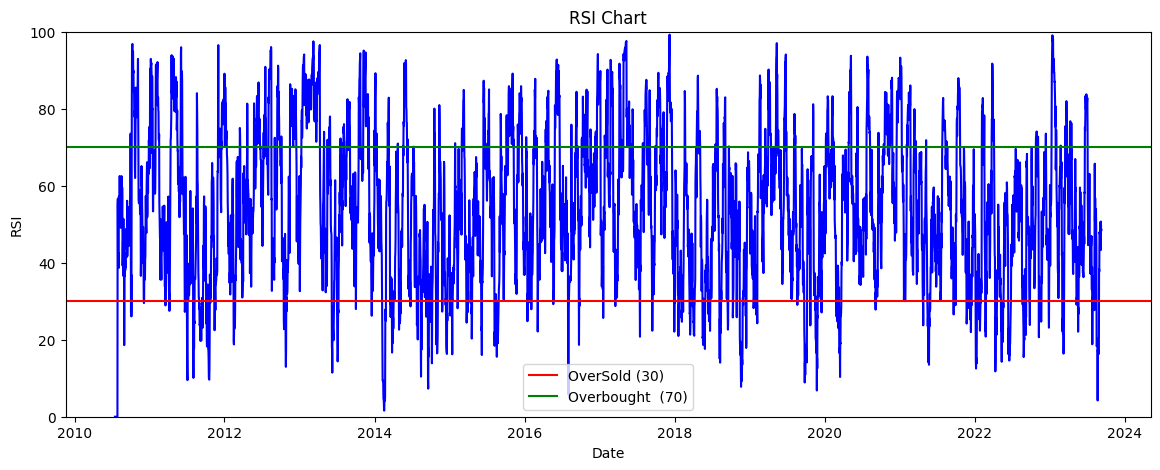

In [7]:
fig, ax = plt.subplots(figsize=(14,5))

ax.plot(df.index, df['RSI'],color='blue')

# We add horizontal lines at 30 and 70
ax.axhline(y=30, color='red', label='OverSold (30)')
ax.axhline(y=70, color='green', label='Overbought  (70)')

ax.set_ylim(0, 100)

ax.set_xlabel('Date')
ax.set_ylabel('RSI')
ax.set_title('RSI Chart')
ax.legend()

plt.show()

El desplazamiento de la columna de precios permite que el modelo de predicción use las características calculadas en un día específico para predecir el precio de cierre del día siguiente:

*The shifting of the price column allows the prediction model to use the features calculated on a specific day to predict the closing price of the following day.*

In [8]:
df['original_series'] = df['original_series'].shift(-1)

In [9]:
df = df.dropna()

## *Train, val and test split*

Para obtener una evaluación más rigurosa y evitar el sobreajuste, realizaremos la división en tres conjuntos de datos.

*To obtain a more rigorous evaluation and prevent overfitting, we will perform the split into three datasets.*

In [10]:

test_size = 0.10
valid_size = 0.10


test_split_idx = int(len(df) * (1 - test_size))
valid_split_idx = int(len(df) * (1 - (valid_size + test_size)))

train_df = df.iloc[:valid_split_idx].copy()
valid_df = df.iloc[valid_split_idx:test_split_idx].copy()
test_df = df.iloc[test_split_idx:].copy()


fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['original_series'], name='Training'))
fig.add_trace(go.Scatter(x=valid_df.index, y=valid_df['original_series'], name='Validation'))
fig.add_trace(go.Scatter(x=test_df.index,  y=test_df['original_series'],  name='Test'))
fig.show()

In [11]:
#We drop unnecessary columns
drop_cols = ['sqrt', 'inverse', 'squared', 'boxcox']

train_df = train_df.drop(drop_cols, 1)
valid_df = valid_df.drop(drop_cols, 1)
test_df  = test_df.drop(drop_cols, 1)

In [12]:
#Split into features and labels
y_train = train_df['original_series'].copy()
X_train = train_df.drop(['original_series'], 1)

y_valid = valid_df['original_series'].copy()
X_valid = valid_df.drop(['original_series'], 1)

y_test  = test_df['original_series'].copy()
X_test  = test_df.drop(['original_series'], 1)

## *XGBoost Model*

Primero, buscamos los mejores hiperparámetros:

*First, we search for the best hyperparameters:*

In [14]:
%%time

parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 400, 'random_state': 42}
Best validation score = 0.34136206044705786
CPU times: user 49min 50s, sys: 18.7 s, total: 50min 9s
Wall time: 27min 57s


Ahora, corremos el modelo con los hiperparámetros obtenidos:

*Now, we run the model with the obtained hyperparameters:*

In [15]:
%%time
model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

CPU times: user 19 s, sys: 91.4 ms, total: 19.1 s
Wall time: 13.4 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

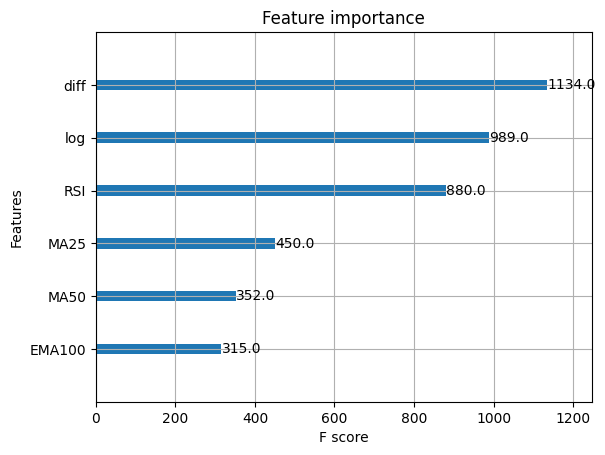

In [19]:
plot_importance(model);

Vemos un ejemplo de predicción.

*Let's see an example of the prediction.*

In [20]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

y_true = [29981.7 29311.1 29548.3 29789.2 29546.4]
y_pred = [32828.297 32571.9   32508.023 30707.555 32172.342]


Veamos el R2 Score y el Error medio de porcentaje absoluto.

*Let's see now de MAPE and the R2Score.*

In [21]:
r2 = r2_score(y_test, y_pred)

print(f'R2_score = {r2}')

print(f'mean_absolute_percentage_error = {mean_absolute_percentage_error(y_test, y_pred)}')

R2_score = 0.6715315830015294
mean_absolute_percentage_error = 0.08201166022792407


In [24]:
from plotly.subplots import make_subplots

test_split_date = df.index[test_split_idx]

predicted_prices = df[test_split_date:].copy()
predicted_prices['original_series'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.index, y=df['original_series'],
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.index,
                         y=predicted_prices['original_series'],
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.index,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.index,
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()

## Conclusión/ *Conclusion*


El resultado del modelo XGBoost muestra un coeficiente de determinación (R2_score) de 0.699, lo que indica que el modelo es capaz de explicar aproximadamente el 69.9% de la variabilidad en los datos de la serie temporal. Además, el error porcentual medio absoluto (mean_absolute_percentage_error) es del 7.8%, lo que sugiere que el modelo tiene un buen desempeño en la predicción de la serie temporal, ya que el error porcentual promedio es relativamente bajo.

*The result of the XGBoost model shows a coefficient of determination (R2_score) of 0.699, indicating that the model is able to explain approximately 69.9% of the variability in the time series data. Furthermore, the mean absolute percentage error is 7.8%, suggesting that the model performs well in time series prediction, as the average percentage error is relatively low.*